## BINOMIAL TEST
Used for <font color='red'>Binary Categorical Data</font> to compare a <font color='red'> sample frequency </font> to an expected population-level probability

Example:

Live-it-LIVE.com — a website that sells all the necessary props and costumes to recreate iconic movie scenes at home!		
The marketing department at Live-it-LIVE reports that, during this time of year, `about 10% of visitors` to Live-it-LIVE.com make a purchase.						
						
The monthly report shows every visitor to the site and whether or not they made a purchase. The checkout page had a small bug this month, so the business department `wants to know whether the purchase rate dipped below expectation`. They’ve asked us to investigate this question.						
						
In order to run a hypothesis test to address this, we’ll first need to know two things from the data:	

1. The number of people who visited the website						
2. The number of people who made a purchase on the website						


 • `Null:` We observed that only 41 visitors (8.2%) out of 500 made a purchase. This is below our expected 10%. but this is only happened by chance and there's is no significant difference.

 • `Alternative:` Visitor making a purchase was not 10%. Significantly different.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

monthly_report = pd.read_csv('monthly_report.csv')
monthly_report.head()

,timestamp,purchase,item
0,2020-01-17 17:23:06,y,cue cards - love actually
1,2020-01-25 17:09:39,n,NaN
2,2020-01-25 05:22:01,n,NaN
3,2020-01-18 04:33:40,y,t-rex - jurassic park
4,2020-01-24 17:24:52,n,NaN


In [20]:
monthly_report.purchase.unique()

array(['y', 'n'], dtype=object)

### `Checking the number of people who visited the website`

In [21]:
num_visit = len(monthly_report)
num_visit

500

### `Checking the number of people who made a purchase on the website`

In [22]:
num_purchased = np.sum(monthly_report.purchase == 'y')
num_purchased

41

## Creating a simulation to test out hypothesis

### We simulate a 500 sample population and list down the number of who made a purchase. 10% is encoded to get a y (yes). Repeat this 10000 times.  Put the result in a list

Example.

trial 1 = 49 made a purchase

trial 2 = 70 made a purchase

and so on...
list = [49,70,....]

In [37]:
# null_outcomes, this is a list of all visitors who made a purchase ('y') 
null_outcomes = []

# We use random.choise between 'y' and 'n' with 10% probability of getting a 'y'.
# our sample size is 500 (simulated visitors)
# repeat this 10000 times
for i in range(10000):
  simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
  num_purchased = np.sum(simulated_monthly_visitors == 'y')
  null_outcomes.append(num_purchased)

# Showing the first 10 results
null_outcomes[0:10]

[40, 44, 49, 46, 56, 50, 42, 41, 43, 41]

## Inspecting the Null Distribution

In [38]:
#calculate the minimum and maximum values in null_outcomes
null_max = np.max(null_outcomes)
null_max

78

In [39]:
null_min = np.min(null_outcomes)
null_min

24

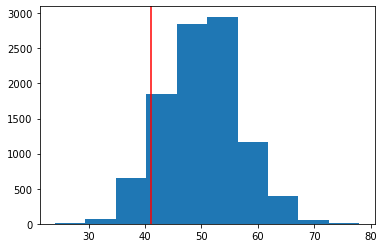

In [40]:
# our observed num_purchased is 41 vs our null outcomes
plt.hist(null_outcomes)
plt.axvline(41, color = 'r')
plt.show()

## Confidence Intervals (95%)

In [41]:
# we subract the remaining 5% from both side of our null outcomes distributuin
np.percentile(null_outcomes, [2.5,97.5])

array([37., 64.])

With 95% Confidence Interval our frequency should be in between 37 and 63, We got observed purchase of 41. 

# Conclusion:

We are 95% confident that if each visitor has a 10% chance of making a purchase, a random sample of 500 visitors will make between 37 and 63 purchases. There is no significant diference and we will accept our null hypothesis. 


### Extra's

 <font color='red'> One-Sided P-Value </font>

We estimated that the probability of observing 41 or fewer purchase is about 9.82%.

`calculating the proportion of values in null_outcomes that are less than or equal to 41`

In [55]:
# Turn into array
null_outcomes = np.array(null_outcomes)
p_one_value = np.sum(null_outcomes <= 41) / len(null_outcomes)
p_one_value * 100

9.55

How about observation of buying less than 37?

In [43]:
p_one_value_37 = np.sum(null_outcomes < 37) / len(null_outcomes)
p_one_value_37 * 100

1.73

 Higher than 64?

In [49]:
p_one_value_64 = np.sum(null_outcomes > 64) / len(null_outcomes)
p_one_value_64 * 100

1.83

 <font color='red'> Two-Sided P-Value </font>

Remember that our expected frequency is 10% of 500 samples which is 50.

In [50]:
# Our expectation frequency is 50 and obrserved frequency is 41, 50-41 is 9(difference from left). 
# We need to add another 9 from 41 to get the value from right side of the distribution. We will get 59
p_two_value = np.sum((null_outcomes <= 41) | (null_outcomes >= 59))/len(null_outcomes)
p_two_value * 100

19.84


 <font color='red'> Using binom_test function from scipy.stats</font>


Compare this result from the above one and two P-value computation.

In [14]:
from scipy.stats import binom_test

In [51]:
p_value_2sided = binom_test(41, n=500, p=0.1, alternative='two-sided')
p_value_2sided * 100

20.45639770067831

In [52]:
p_value_1sided = binom_test(41, n=500, p=0.1, alternative = 'less')
p_value_1sided * 100

10.011352697564881

In [56]:
p_value_1side_greater = binom_test(41, n=500, p=0.1, alternative = 'greater')
p_value_1side_greater * 100

92.49107103409406

# Important Reminder:

`All hypothesis tests start with a null and alternative hypothesis`

`Outcomes of a hypothesis test that might be reported include:`

 - `confidence intervals`
 - `p-values`
 
`A hypothesis test can be simulated by:`

 - `taking repeated random samples where the null hypothesis is assumed to be true
    using those simulated samples to generate a null distribution`
 - `comparing an observed sample statistic to that null distribution`